In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\MD_agric_exam-4313.csv")

In [3]:
df.head(5)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [4]:
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [6]:
crop = df["Crop_type"].unique()
crop

array(['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea',
       'rice'], dtype=object)

In [7]:
len(crop)

8

In [8]:
wheat_df =round( df[df['Crop_type'] == 'wheat']["Annual_yield"].max(),2)
wheat_df

8.99

In [9]:
filtered_df = df[df["Pollution_level"] > 0.2]

total_rainfall_by_crop = filtered_df.groupby("Crop_type") ["Rainfall"].sum()

total_rainfall_by_crop

Crop_type
banana     32765.4
cassava    90085.7
coffee     51655.2
maize      38110.5
potato     66653.0
rice        6362.4
tea        93523.5
wheat      99746.9
Name: Rainfall, dtype: float64

In [10]:
avg_pollution = df.groupby('Crop_type')['Pollution_level'].mean()
filtered_crop_types = avg_pollution[avg_pollution > 0.2].index.tolist()
filtered_df = df[df['Crop_type'].isin(filtered_crop_types)]
total_rainfall = filtered_df['Rainfall'].sum()
total_rainfall

941959.7

Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [11]:
def calculate_temperature_range(field_id):
    # Filter data for the given field ID
    field_data = df[df['Field_ID'] == field_id]
    
    # Calculate temperature range for the field
    temperature_range = field_data['Max_temperature_C'].max() - field_data['Min_temperature_C'].min()
    
    return temperature_range

#Call the function for Field_ID: 1458, 1895, and 5443
field_1458_range = calculate_temperature_range(1458)
field_1895_range = calculate_temperature_range(1895)
field_5443_range = calculate_temperature_range(5443)

print("Temperature range for Field_ID 1458:", field_1458_range, "C")
print("Temperature range for Field_ID 1895:", field_1895_range, "C")
print("Temperature range for Field_ID 5443:", field_5443_range, "C")

Temperature range for Field_ID 1458: 40.7 C
Temperature range for Field_ID 1895: 35.7 C
Temperature range for Field_ID 5443: 33.4 C


What does the following code achieve?

a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

Identifies the minimum temperature for each crop type.
Identifies the crop type with the highest average minimum temperature
Sorts crops_types from the average lowest to highest minimum temperatures.
Identifies the crop type with the lowest average minimum temperature. 

In [12]:
# Filter the dataset for plots where pH is less than 5.5
filtered_df = df[df['pH'] < 5.5]

# Calculate the total plot size for filtered plots
total_plot_size = filtered_df['Plot_size'].sum()

total_plot_size

1731.8999999999999

In [15]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_df.shape[0]

num_rows_filtered

319

In [18]:
import numpy as np

In [19]:
# Convert data to numpy array
plot_sizes = np.array(df['Plot_size'])

# Calculate the median plot size
median_plot_size = np.median(plot_sizes)

# Filter the dataset for plots where the 'Plot_size' is larger than the median plot size
filtered_data = np.array([df['Rainfall'][i] for i in range(len(df['Plot_size'])) if df['Plot_size'][i] > median_plot_size])

# Calculate the standard deviation of 'Rainfall' for the filtered plots
std_dev_rainfall = np.std(filtered_data)

# Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)


In [20]:
std_dev_rainfall_rounded

469.62

In [21]:
# Calculate median plot size
median_plot_size = np.median(df['Plot_size'])

# Filter data for plots with size above median
large_plots = df[df['Plot_size'] > median_plot_size]

# Calculate standard deviation of rainfall for large plots (rounded to 2 decimals)
rainfall_std = np.std(large_plots['Rainfall'])

rainfall_std

469.6199685856172

In [24]:
median_plot = df['Plot_size'].median()
larger_plots = df[df['Plot_size'] > median_plot]
larger_plots.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,497.000000,497.000000
mean,2791.404427,628.605822,1249.135815,-4.454125,30.924748,5.653831,2.234391e-01,6.383099,3.372492
std,1556.225370,178.269553,470.093137,1.540563,1.971115,0.811947,2.311360e-01,3.458818,2.025365
min,29.000000,111.650955,263.000000,-8.900000,25.900000,4.002131,5.397448e-10,3.000000,0.742307
25%,1565.000000,497.494930,878.300000,-5.600000,29.500000,5.028574,4.216288e-02,3.800000,1.926233
50%,2714.000000,663.056500,1258.500000,-4.200000,30.900000,5.626855,1.553352e-01,4.700000,2.525218
75%,4149.000000,757.077300,1637.500000,-3.300000,32.300000,6.247014,3.202676e-01,8.900000,4.427100
max,5628.000000,981.687400,2408.500000,-1.200000,37.300000,7.484683,9.829733e-01,15.000000,12.695224


If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [25]:
# Find the most common 'Max_temperature_C' value
most_common_temp = df['Max_temperature_C'].mode()[0]

# Find the least common 'Crop_type' value
least_common_crop = df['Crop_type'].value_counts().idxmin()

# Concatenate the first three digits of the most common temperature with the last three letters of the least common crop type
result_string = str(most_common_temp)[:3] + least_common_crop[-3:]

result_string

'30.ice'

In [26]:
# Most common Max_temperature_C (first mode)
most_common_temp = df['Max_temperature_C'].mode()[0]

# Least common Crop_type
least_common_crop = df['Crop_type'].value_counts().idxmin()

# Extract first three digits of most common temperature
temp_str = str(most_common_temp)[:3]

# Extract last three letters of least common crop type
crop_str = least_common_crop[-3:]

# Concatenate strings
result_string = temp_str + crop_str

result_string

'30.ice'

Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

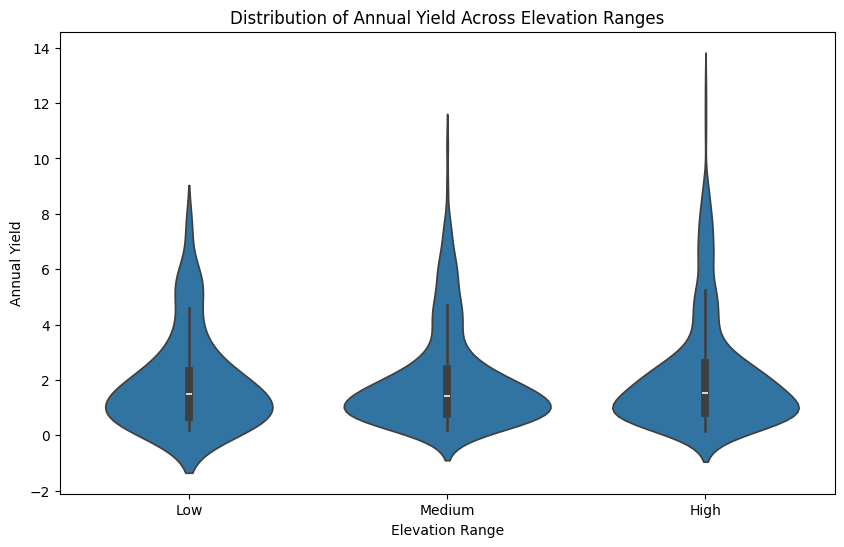

In [28]:
# Categorize 'Elevation' into ranges
df['Elevation_range'] = pd.cut(df['Elevation'], bins=[0, 300, 600, float('inf')], labels=['Low', 'Medium', 'High'])

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_range', y='Annual_yield', data=df)
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8744\3947279131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Elevation_category", y="Annual_yield", data=df, palette="muted", inner="quartile")


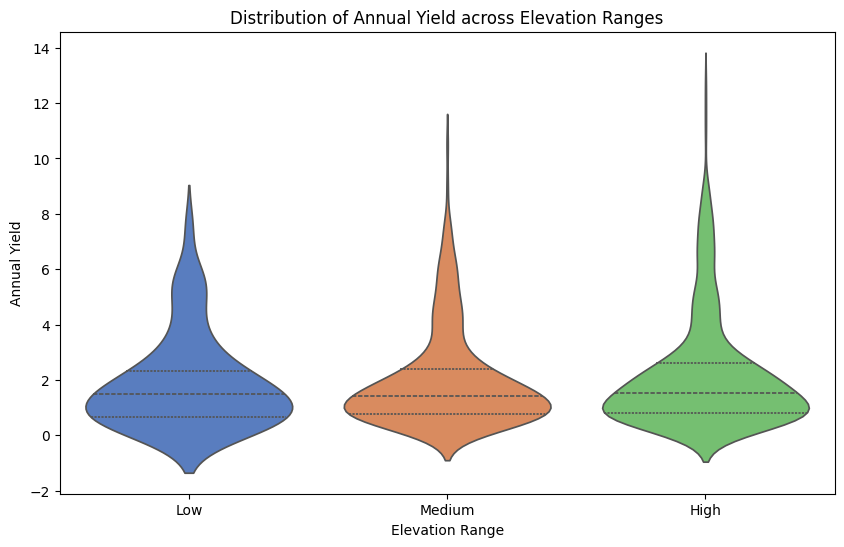

In [31]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv("C:\\Users\\user\\Downloads\\MD_agric_exam-4313.csv")

# Categorize elevation based on provided ranges
df["Elevation_category"] = pd.cut(df["Elevation"], bins=[-float("inf"), 300, 600, float("inf")],
                                  labels=["Low", "Medium", "High"])

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Elevation_category", y="Annual_yield", data=df, palette="muted", inner="quartile")
plt.xlabel("Elevation Range")
plt.ylabel("Annual Yield")
plt.title("Distribution of Annual Yield across Elevation Ranges")
plt.show()

1.The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. This could indicate that lower elevations provide stable conditions for consistent agricultural output.
2.The violin is not visible for the high elevation category. This means that there are very few or no data points in this category.
3.'Low' elevation has the highest yield variability, suggesting that these areas might experience a wider range of factors influencing agricultural productivity.
4.'Medium' elevation exhibits a variability in yield, but to a significantly lesser extent than the 'High' elevation, potentially due to a mix of conditions that affect crop yield. 

Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [32]:
def sum_crop_type_lengths(df, index=0, unique_crop_types=None):
    if unique_crop_types is None:
        # Get unique crop types if not provided
        unique_crop_types = df['Crop_type'].unique()
    
    # Base case: if index exceeds the length of unique crop types, return 0
    if index >= len(unique_crop_types):
        return 0
    
    # Get the current crop type
    crop_type = unique_crop_types[index]
    
    # Calculate the length of the current crop type and recursively call the function for the next index
    length = len(crop_type)
    next_sum = sum_crop_type_lengths(df, index + 1, unique_crop_types)
    
    # Return the sum of the current length and the sum from the next index
    return length + next_sum

# Call the function to get the sum of integer values for each unique crop type
total_sum = sum_crop_type_lengths(df)

total_sum

42

Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [35]:
import pandas as pd
from scipy.stats import ttest_ind

In [43]:
 #Separate data for 'coffee' and 'banana' crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print("The p-value for the t-test comparing average 'Annual_yield' between 'coffee' and 'banana' crop types:", round(p_value, 3))

The p-value for the t-test comparing average 'Annual_yield' between 'coffee' and 'banana' crop types: 0.598
